In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\heart_diseases.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
print("Missing values after filling with median:")
print(df.isnull().sum())


Missing values after filling with median:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [10]:

def identify_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = identify_outliers(df)
print("Outliers in the DataFrame:")
for col, outlier_data in outliers.items():
    print(f"Column: {col}")
    print(outlier_data)


Outliers in the DataFrame:
Column: age
     age   sex               cp  trestbps  chol    fbs         restecg  \
134   29  Male  atypical angina       130   204  False  lv hypertrophy   

     thalch  exang  oldpeak      slope    thal  num  
134     202  FALSE      0.0  upsloping  normal    0  
Column: trestbps
     age     sex               cp  trestbps  chol    fbs           restecg  \
190   53    Male     asymptomatic        80     0   True            normal   
243   39    Male  atypical angina       190   241  False            normal   
383   63  Female  atypical angina       181     0  False            normal   
384   74    Male      non-anginal       188     0  False            normal   
387   45    Male      non-anginal       193   236  False            normal   
396   55    Male      non-anginal       196   406  False  st-t abnormality   
487   54    Male  atypical angina       192   283  False    lv hypertrophy   
488   63    Male     asymptomatic       185     0  False       

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Unique values in categorical columns:")
for column in categorical_columns:
    print(f"{column}:")
    print(df[column].unique())


Unique values in categorical columns:
sex:
['Male' 'Female']
cp:
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']
exang:
['FALSE' 'TRUE' 'TURE']
slope:
['downsloping' 'flat' 'upsloping']
thal:
['fixed defect' 'normal' 'reversable defect']


In [12]:
import seaborn as sns


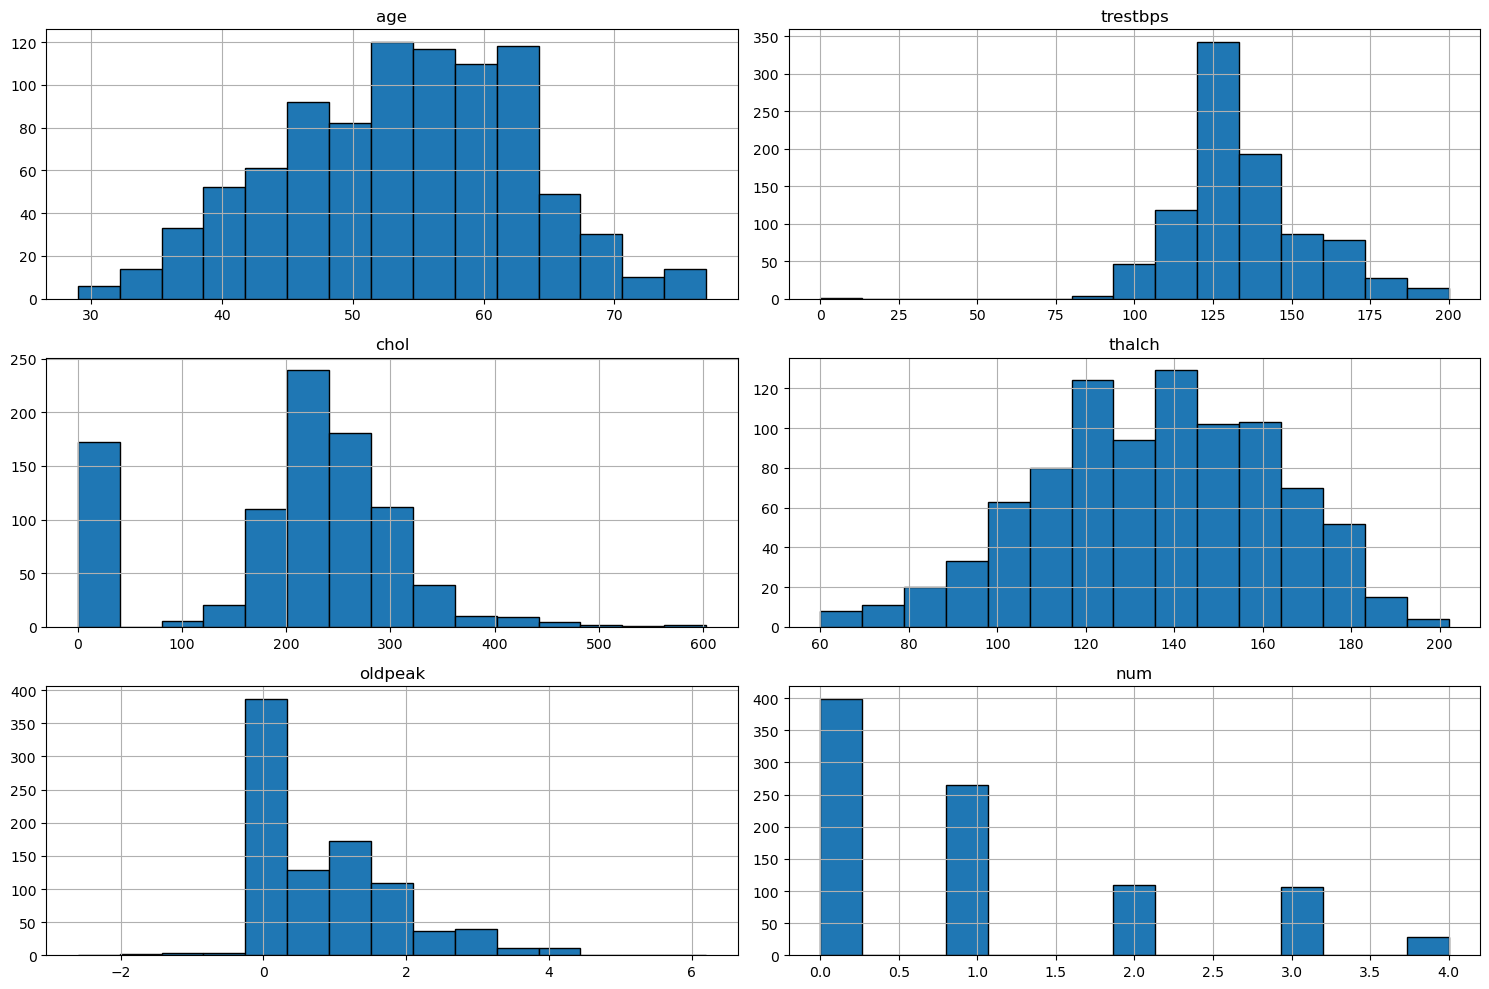

In [13]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


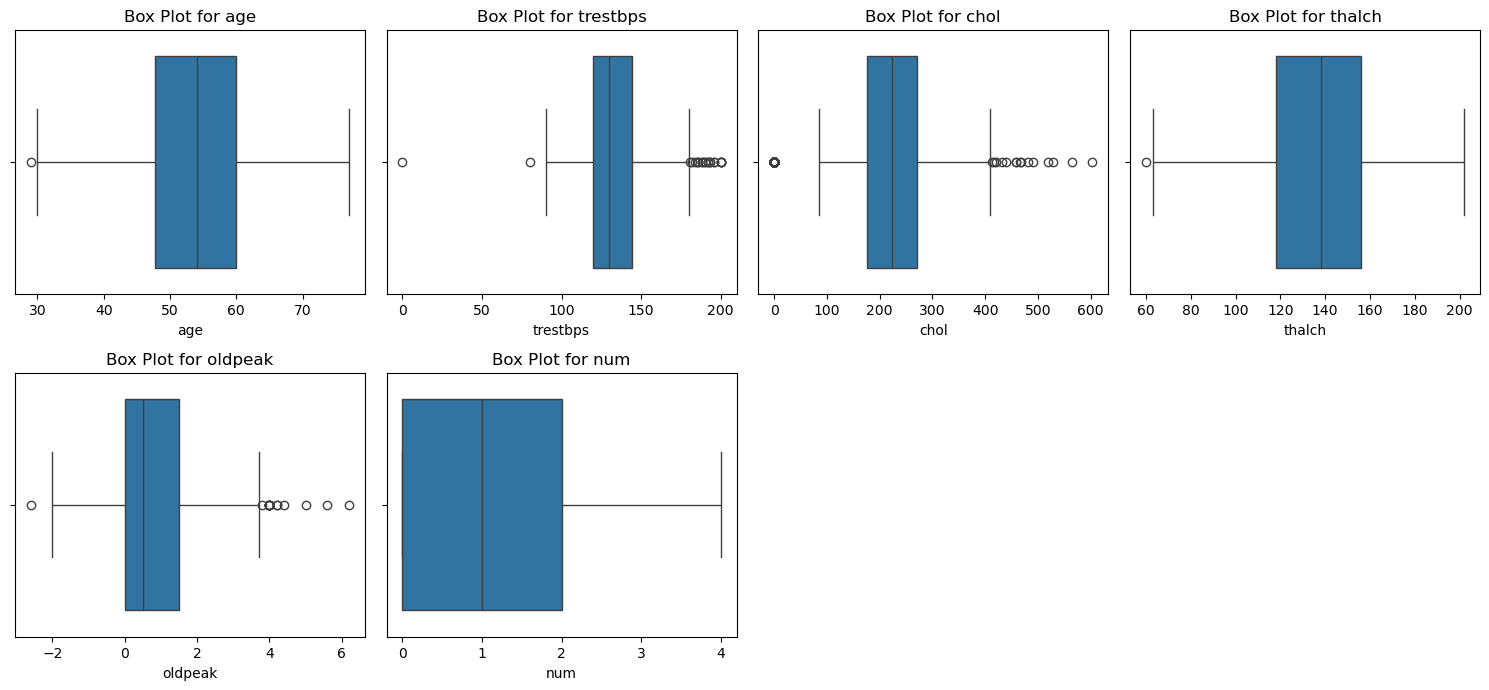

In [14]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i) 
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()


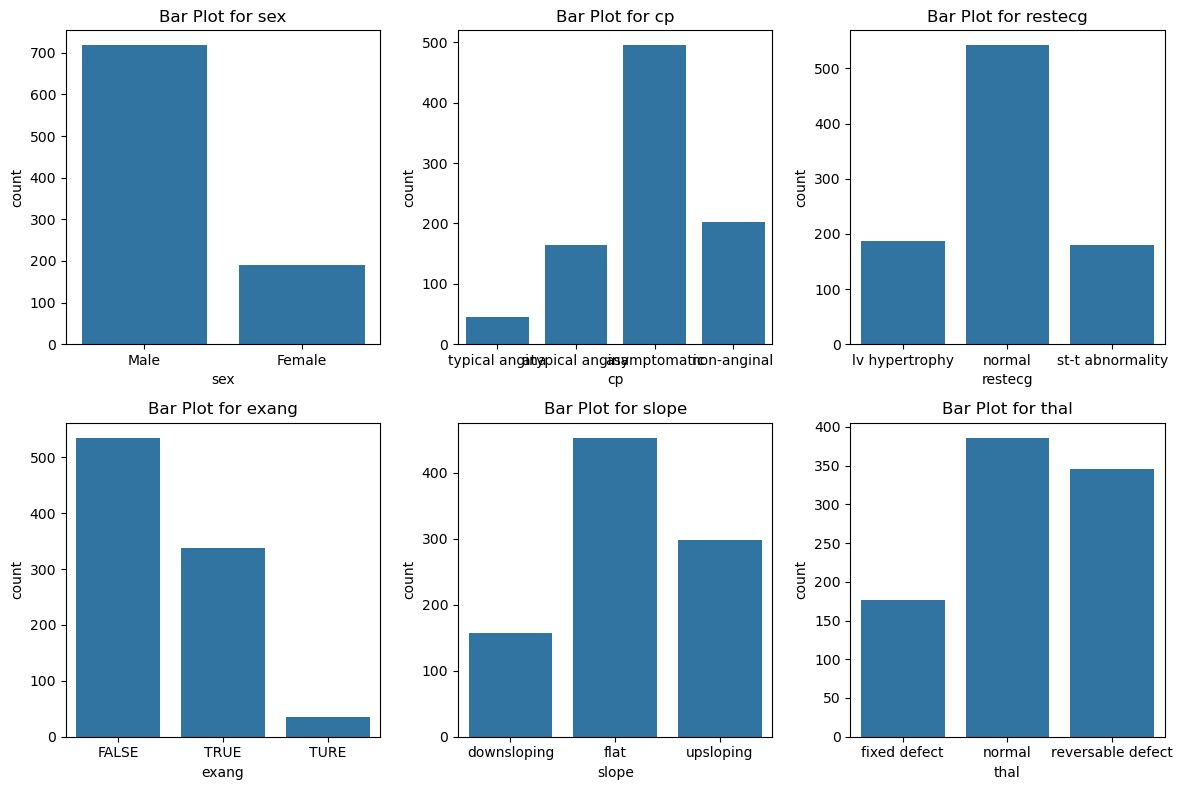

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.countplot(x=column, data=df)
    plt.title(f'Bar Plot for {column}')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [18]:
X = df.drop(columns=['num']) 
y = df['num']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:

y_pred = dt_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')  

roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')  
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.52
Precision: 0.51
Recall: 0.52
F1 Score: 0.52
ROC-AUC: 0.59


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_split': [2, 5, 10, 20],  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': [1, 2, 4, 10],  
    'max_features': [None, 'sqrt', 'log2']  
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)
best_dt_classifier = grid_search.best_estimator_

y_pred = best_dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_dt_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1 Score: 0.53
ROC-AUC: 0.71


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),  
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 10),  
    'max_features': ['sqrt', 'log2', None]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best Parameters from Random Search:", random_search.best_params_)
best_dt_classifier_random = random_search.best_estimator_

y_pred_random = best_dt_classifier_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, average='weighted')
recall_random = recall_score(y_test, y_pred_random, average='weighted')
f1_random = f1_score(y_test, y_pred_random, average='weighted')
roc_auc_random = roc_auc_score(y_test, best_dt_classifier_random.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy (Random Search): {accuracy_random:.2f}")
print(f"Precision (Random Search): {precision_random:.2f}")
print(f"Recall (Random Search): {recall_random:.2f}")
print(f"F1 Score (Random Search): {f1_random:.2f}")
print(f"ROC-AUC (Random Search): {roc_auc_random:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from Random Search: {'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 19}
Accuracy (Random Search): 0.54
Precision (Random Search): 0.48
Recall (Random Search): 0.54
F1 Score (Random Search): 0.51
ROC-AUC (Random Search): 0.70


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1 Score: 0.53
ROC-AUC: 0.75


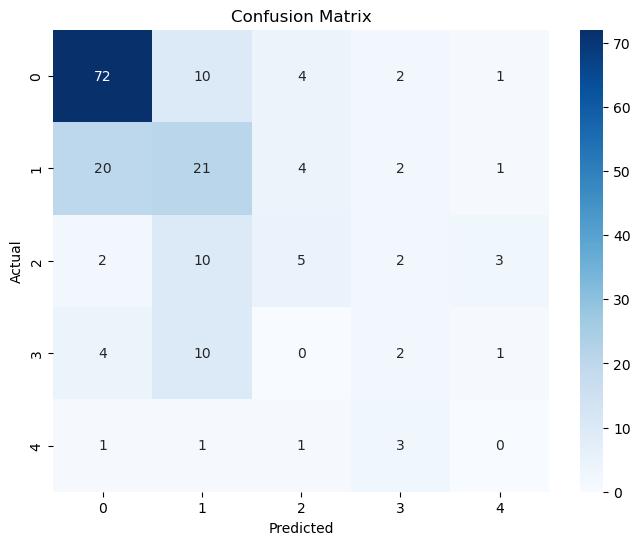

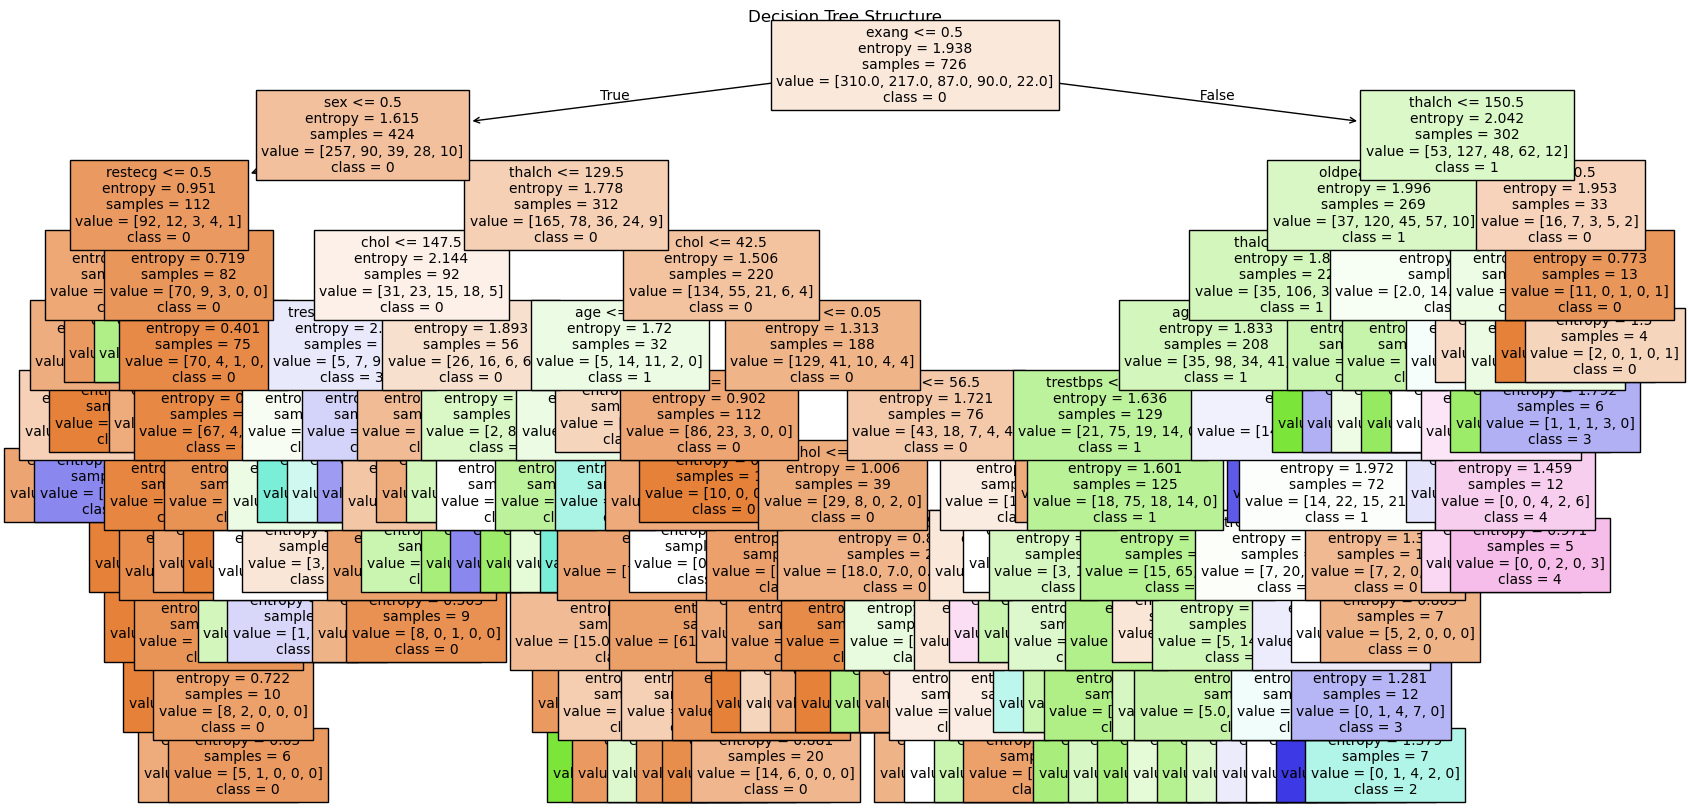

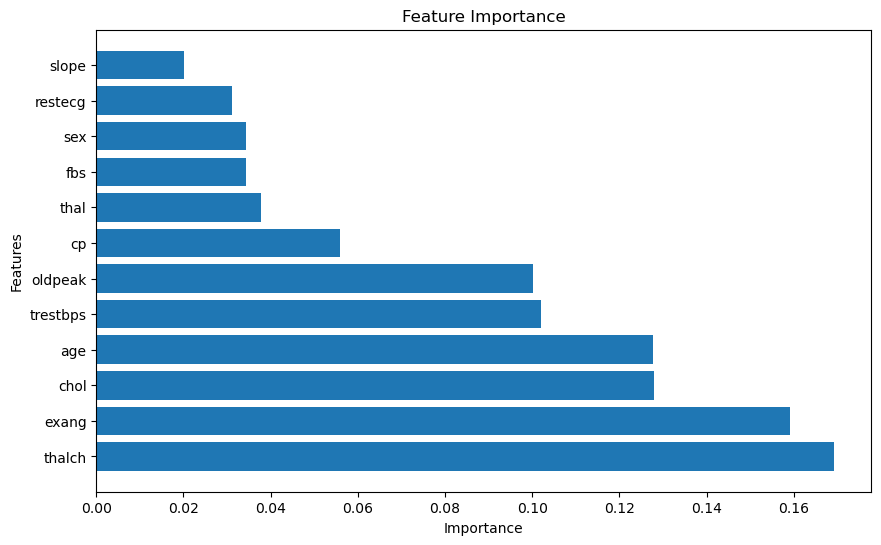

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have already trained your Decision Tree model and have predictions

# Get predicted probabilities instead of class predictions
y_pred_prob = best_dt_classifier.predict_proba(X_test)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')  # Use predicted probabilities for ROC-AUC

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the decision tree structure
class_names = np.unique(y_train)  # Ensure class_names match the actual target labels

plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in class_names], fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

# Feature importance visualization
feature_importances = best_dt_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
